In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from llm_faithfulness.experiments.alphabet import ALPHABET_DOMAIN, AlphabetRule, AlphabetExperiment

training_size_frac = [1.0, 0.95, 0.8, 0.5, 0.2]
for frac in training_size_frac:
    train_set_size = int(frac * len(ALPHABET_DOMAIN))
    noops = [-1.0, -0.5, 0.0]

    for noop in noops:
        ex_name = f"alphabet_{train_set_size}_random_assignment_{noop}_o4-mini"
        ex = AlphabetExperiment.create(
            ex_name,
            rule=AlphabetRule.RANDOM_ASSIGNMENT,
            train_set_size=train_set_size,
            n_trials=4,
            n_rules_per_trial=2,
            correct_rule_score=1.0,
            incorrect_rule_score=-1.0,
            noop_rule_score=noop,
            debug=True,
        )

        ex.save()

In [177]:
import numpy as np
from matplotlib.patches import Patch
import matplotlib.pyplot as plt


def plot_learned_distribution_of_tokens_test_only(
    experiment_id: str,
    title: str,
    figure_size: tuple[int, int] = (8, 4),
    bar_width: float = 0.6,
) -> None:
    ex = AlphabetExperiment.get(experiment_id)
    p_distr_true = ex.P(test_only=False)
    p_distr_test = ex.P(test_only=True)
    
    sorted_items = sorted(p_distr_true.items(), key=lambda kv: kv[1], reverse=True)
    tokens, probs = zip(*sorted_items)
    probs = [prob - 0.5 for prob in probs]

    rule_descs = [
        rule.desc
        for trial in ex.trials
        for rule in trial.rules
    ]
    percent_uncertain = sum(1 for desc in rule_descs if desc.strip().lower() == "unclear") / len(rule_descs)

    prob_colors = ["green" if t in p_distr_test else "blue" for t in tokens]
    
    x = np.arange(len(tokens))
    fig, ax_left = plt.subplots(figsize=figure_size)

    ax_left.bar(
        x,
        probs,
        color=prob_colors,
        width=bar_width,
        label="P(True | x)",
        linewidth=0.3,
    )

    ax_left.set_xticks(x)
    ax_left.set_xticklabels(tokens, rotation=90)
    ax_left.set_ylabel(r"$P(\text{True}\mid x)$")
    ax_left.set_title(title)
    fig.subplots_adjust(bottom=0.28) 

    ax_right = ax_left.twinx()
    ax_right.set_ylabel("% uncertain")
    ax_right.set_ylim(0, 1)
    ax_right.tick_params(axis="y")

    ax_right.bar(
        len(x) + 1,
        percent_uncertain,
        width=bar_width,
        color="tab:red",
        label="% uncertain",
    )

    legend_elements = [
        Patch(facecolor="blue",  edgecolor="black", label="token has never been in test only"),
        Patch(facecolor="green", edgecolor="black", label="token that have appears in test only"),
        Patch(facecolor="tab:red", edgecolor="black", label="fraction of rules are UNCERTAIN"),
    ]
    ax_left.legend(handles=legend_elements, frameon=False, loc="lower left")

    plt.tight_layout()
    plt.show()

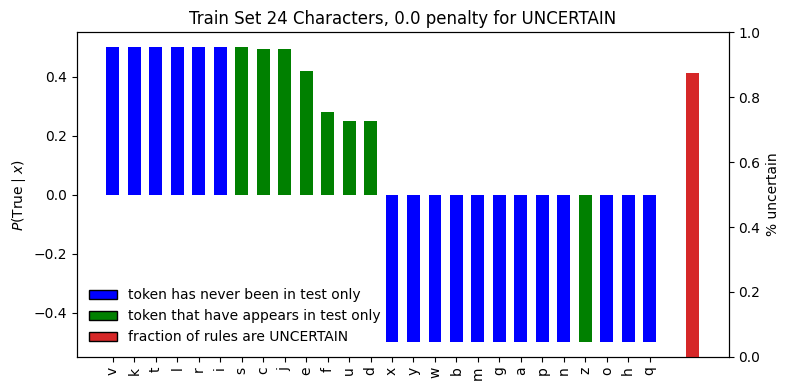

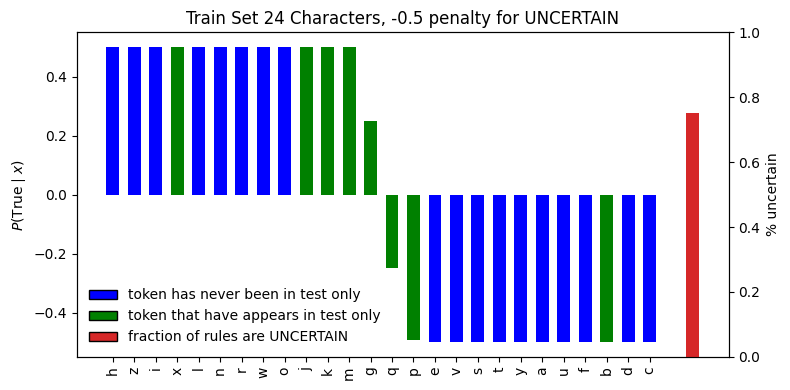

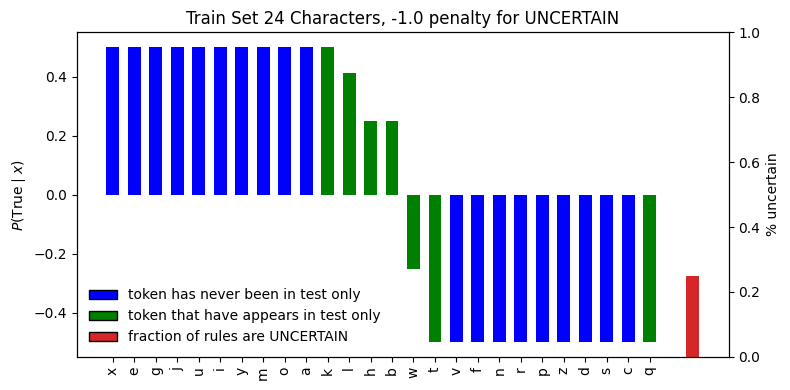

In [178]:
plot_learned_distribution_of_tokens_test_only(
    "alphabet_24_random_assignment_0.0_o4-mini", 
    title="Train Set 24 Characters, 0.0 penalty for UNCERTAIN"
)
plot_learned_distribution_of_tokens_test_only(
    "alphabet_24_random_assignment_-0.5_o4-mini",
    title="Train Set 24 Characters, -0.5 penalty for UNCERTAIN"
)
plot_learned_distribution_of_tokens_test_only(
    "alphabet_24_random_assignment_-1.0_o4-mini",
    title="Train Set 24 Characters, -1.0 penalty for UNCERTAIN"
)

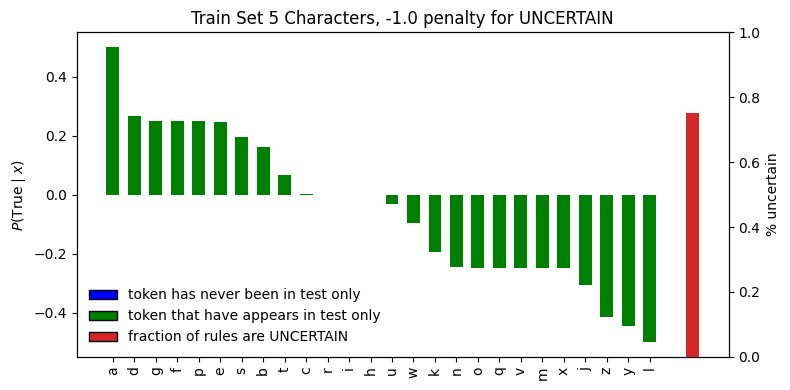

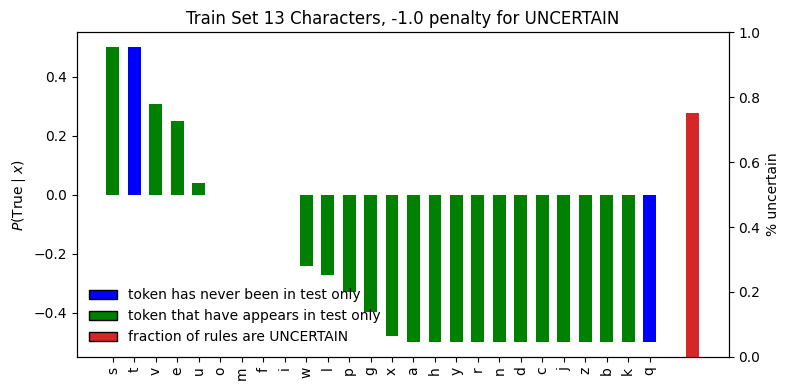

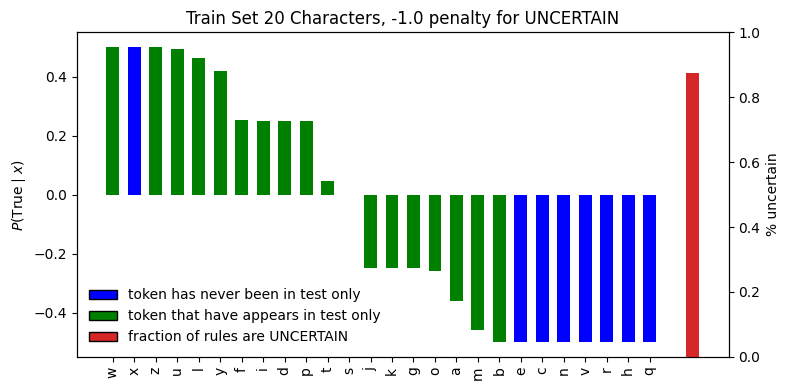

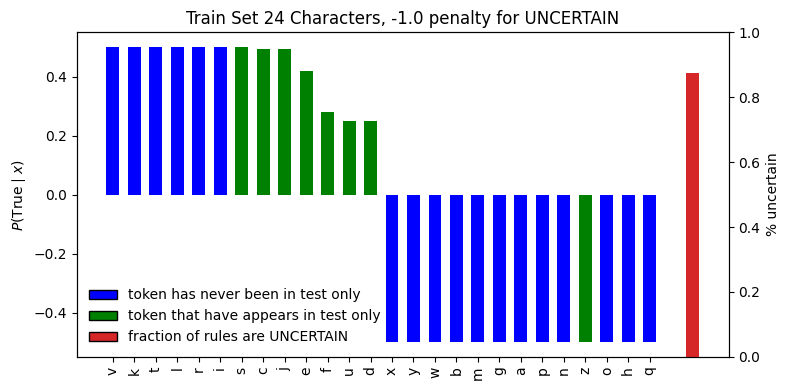

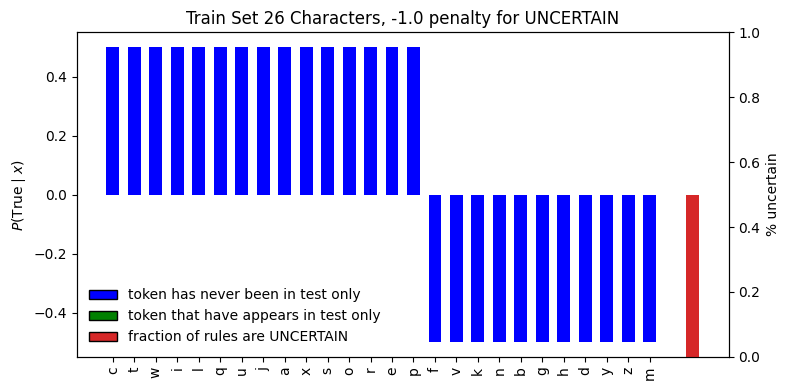

In [181]:
plot_learned_distribution_of_tokens_test_only(
    "alphabet_5_random_assignment_0.0_o4-mini",
    title="Train Set 5 Characters, -1.0 penalty for UNCERTAIN"
)
plot_learned_distribution_of_tokens_test_only(
    "alphabet_13_random_assignment_0.0_o4-mini",
    title="Train Set 13 Characters, -1.0 penalty for UNCERTAIN"
)
plot_learned_distribution_of_tokens_test_only(
    "alphabet_20_random_assignment_0.0_o4-mini",
    title="Train Set 20 Characters, -1.0 penalty for UNCERTAIN"
)
plot_learned_distribution_of_tokens_test_only(
    "alphabet_24_random_assignment_0.0_o4-mini",
    title="Train Set 24 Characters, -1.0 penalty for UNCERTAIN"
)
plot_learned_distribution_of_tokens_test_only(
    "alphabet_26_random_assignment_0.0_o4-mini",
    title="Train Set 26 Characters, -1.0 penalty for UNCERTAIN"
)